# Loading Libraries and Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('listings.csv')

In [27]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,248,2024-02-27,1.94,1,233,50,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5,NaN


# Data describe

In [28]:
df.shape

(404, 18)

###### we note that there are 18 features may affect on analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              404 non-null    int64  
 1   name                            404 non-null    object 
 2   host_id                         404 non-null    int64  
 3   host_name                       404 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   404 non-null    object 
 6   latitude                        404 non-null    float64
 7   longitude                       404 non-null    float64
 8   room_type                       404 non-null    object 
 9   price                           350 non-null    float64
 10  minimum_nights                  404 non-null    int64  
 11  number_of_reviews               404 non-null    int64  
 12  last_review                     362 

# Data Cleaning

###### Now we will see if there are Null Values and start the processing operation on the data

In [30]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group               404
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                              54
minimum_nights                      0
number_of_reviews                   0
last_review                        42
reviews_per_month                  42
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           404
dtype: int64

In [31]:
df.isnull().sum().sum()

946

###### There are null values in 5 columns and their number equal 946
###### But note that all values of columns (neighbourhood_group and license ) are null values so there is not problem if we delete those columns ,then filled data.

In [32]:
df=df.drop(['neighbourhood_group','license'] , axis=1)

In [43]:
df.head(7)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,248,2024-02-27,1.94,1,233,50
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.64615,-73.75966,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5
5,7563949,Rest or work in peace | Garden | Wifi | Kitchen,39656001,Urbangem,SECOND WARD,42.64484,-73.75851,Private room,190.0,1,37,2023-02-19,0.40,6,365,0
6,8035768,Entire Beautiful French Victorian 1884,42430824,John M,TENTH WARD,42.66088,-73.78147,Entire home/apt,NaN,2,56,2024-01-28,0.54,2,365,4


In [34]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             54
minimum_nights                     0
number_of_reviews                  0
last_review                       42
reviews_per_month                 42
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [39]:
missing_price_rows = df[df['price'].isna()]
missing_price_rows

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6,8035768,Entire Beautiful French Victorian 1884,42430824,John M,TENTH WARD,42.660880,-73.781470,Entire home/apt,NaN,2,56,2024-01-28,0.54,2,365,4
34,20519885,30%OffMonthlyStays FamilyOrBusiness InCity,67171774,Michael And Flerida,FOURTEENTH WARD,42.658460,-73.802010,Entire home/apt,NaN,4,92,2024-02-20,1.19,6,311,20
53,27692601,Albany Cozy home with fireplaces and Sunroom,202580880,Rosanne,EIGHTH WARD,42.645140,-73.806680,Entire home/apt,NaN,3,14,2022-10-08,0.21,1,179,0
63,32279028,"Cosy, comfy and quiet for one",172223381,Diana,EIGHTH WARD,42.649360,-73.802780,Private room,NaN,1,196,2024-02-29,3.19,2,0,41
83,42391372,Central Albany Apartment: Walk to State Capitol!,121680792,Evolve,SECOND WARD,42.646900,-73.757610,Entire home/apt,NaN,3,27,2022-10-27,0.60,5,355,0
84,42567833,Homey,339085327,Arkady,NINTH WARD,42.655670,-73.785400,Entire home/apt,NaN,70,0,NaN,NaN,1,365,0
85,42763847,Charming dog friendly home with private yard!,649068,Anthony,FIRST WARD,42.638760,-73.785350,Entire home/apt,NaN,1,92,2023-12-31,1.95,1,145,21
92,44450012,Spacious upscale luxury apartment with huge yard,353498132,Michael,EIGHTH WARD,42.648080,-73.799600,Entire home/apt,NaN,13,22,2023-12-21,0.51,5,251,2
112,48470454,"/ New Giant Victorian \ 7beds 6 baths + 2x 85""...",4259750,Peter,THIRTEENTH WARD,42.665264,-73.786926,Entire home/apt,NaN,2,29,2023-12-03,1.45,9,0,22
118,50354540,Designer 2BED Heart of Center Square,188679144,Elizabeth,SIXTH WARD,42.653330,-73.764020,Entire home/apt,NaN,3,9,2023-08-13,0.27,8,362,5


In [42]:
df[df['price'].isna()]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6,8035768,Entire Beautiful French Victorian 1884,42430824,John M,TENTH WARD,42.660880,-73.781470,Entire home/apt,NaN,2,56,2024-01-28,0.54,2,365,4
34,20519885,30%OffMonthlyStays FamilyOrBusiness InCity,67171774,Michael And Flerida,FOURTEENTH WARD,42.658460,-73.802010,Entire home/apt,NaN,4,92,2024-02-20,1.19,6,311,20
53,27692601,Albany Cozy home with fireplaces and Sunroom,202580880,Rosanne,EIGHTH WARD,42.645140,-73.806680,Entire home/apt,NaN,3,14,2022-10-08,0.21,1,179,0
63,32279028,"Cosy, comfy and quiet for one",172223381,Diana,EIGHTH WARD,42.649360,-73.802780,Private room,NaN,1,196,2024-02-29,3.19,2,0,41
83,42391372,Central Albany Apartment: Walk to State Capitol!,121680792,Evolve,SECOND WARD,42.646900,-73.757610,Entire home/apt,NaN,3,27,2022-10-27,0.60,5,355,0
84,42567833,Homey,339085327,Arkady,NINTH WARD,42.655670,-73.785400,Entire home/apt,NaN,70,0,NaN,NaN,1,365,0
85,42763847,Charming dog friendly home with private yard!,649068,Anthony,FIRST WARD,42.638760,-73.785350,Entire home/apt,NaN,1,92,2023-12-31,1.95,1,145,21
92,44450012,Spacious upscale luxury apartment with huge yard,353498132,Michael,EIGHTH WARD,42.648080,-73.799600,Entire home/apt,NaN,13,22,2023-12-21,0.51,5,251,2
112,48470454,"/ New Giant Victorian \ 7beds 6 baths + 2x 85""...",4259750,Peter,THIRTEENTH WARD,42.665264,-73.786926,Entire home/apt,NaN,2,29,2023-12-03,1.45,9,0,22
118,50354540,Designer 2BED Heart of Center Square,188679144,Elizabeth,SIXTH WARD,42.653330,-73.764020,Entire home/apt,NaN,3,9,2023-08-13,0.27,8,362,5


### we want fill null values of the price by mean

In [46]:
neighborhood_price_means = df.groupby('neighbourhood')['price'].mean()
df['price'] = df['price'].fillna(df['neighbourhood'].map(neighborhood_price_means))

df.loc[83:,:]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
83,42391372,Central Albany Apartment: Walk to State Capitol!,121680792,Evolve,SECOND WARD,42.646900,-73.757610,Entire home/apt,115.571429,3,27,2022-10-27,0.60,5,355,0
84,42567833,Homey,339085327,Arkady,NINTH WARD,42.655670,-73.785400,Entire home/apt,110.290323,70,0,NaN,NaN,1,365,0
85,42763847,Charming dog friendly home with private yard!,649068,Anthony,FIRST WARD,42.638760,-73.785350,Entire home/apt,141.200000,1,92,2023-12-31,1.95,1,145,21
86,43208391,Historic Downtown Albany Apartment,272907816,Angela,SECOND WARD,42.644530,-73.754260,Entire home/apt,117.000000,2,80,2024-02-28,1.90,4,75,14
87,43459803,Luxury & Safety in Center Square + Parking,299638115,Dominick And Flerida,SIXTH WARD,42.655560,-73.762050,Entire home/apt,175.000000,4,15,2024-03-01,0.40,3,365,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1091422934956081673,2 bed with parking off Madison,232967878,Diana,TENTH WARD,42.659882,-73.784858,Entire home/apt,105.000000,2,0,NaN,NaN,22,87,0
400,1091500387329731524,Triplex oasis w:parking near MVP,232967878,Diana,SECOND WARD,42.643241,-73.758052,Entire home/apt,83.000000,2,0,NaN,NaN,22,79,0
401,1097995825442731795,New Center square studio,232967878,Diana,SIXTH WARD,42.652689,-73.765674,Entire home/apt,93.000000,2,0,NaN,NaN,22,75,0
402,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.000000,3,0,NaN,NaN,9,155,0


In [47]:
df[df['price'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [48]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       42
reviews_per_month                 42
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

### now we will fill the remain values by zeros

In [49]:
df=df.fillna(0)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,248,2024-02-27,1.94,1,233,50
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.646150,-73.759660,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1091422934956081673,2 bed with parking off Madison,232967878,Diana,TENTH WARD,42.659882,-73.784858,Entire home/apt,105.0,2,0,0,0.00,22,87,0
400,1091500387329731524,Triplex oasis w:parking near MVP,232967878,Diana,SECOND WARD,42.643241,-73.758052,Entire home/apt,83.0,2,0,0,0.00,22,79,0
401,1097995825442731795,New Center square studio,232967878,Diana,SIXTH WARD,42.652689,-73.765674,Entire home/apt,93.0,2,0,0,0.00,22,75,0
402,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.0,3,0,0,0.00,9,155,0



## Check for Duplicates

In [51]:
df.duplicated().sum()

0

## Check for outlayers

In [62]:
df_describe=df[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()
df_describe

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,101.130413,1.918033,25.393443,1.306516,4.012295,212.127049,10.303279
std,35.079189,1.070288,32.608428,1.208185,3.175889,132.098496,11.691430
min,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,79.000000,1.000000,4.000000,0.367500,1.000000,88.750000,1.000000
50%,101.000000,2.000000,12.000000,0.945000,3.000000,254.500000,6.000000
75%,120.000000,2.000000,33.000000,2.000000,6.000000,339.750000,15.000000
max,191.000000,6.000000,146.000000,5.680000,12.000000,365.000000,51.000000


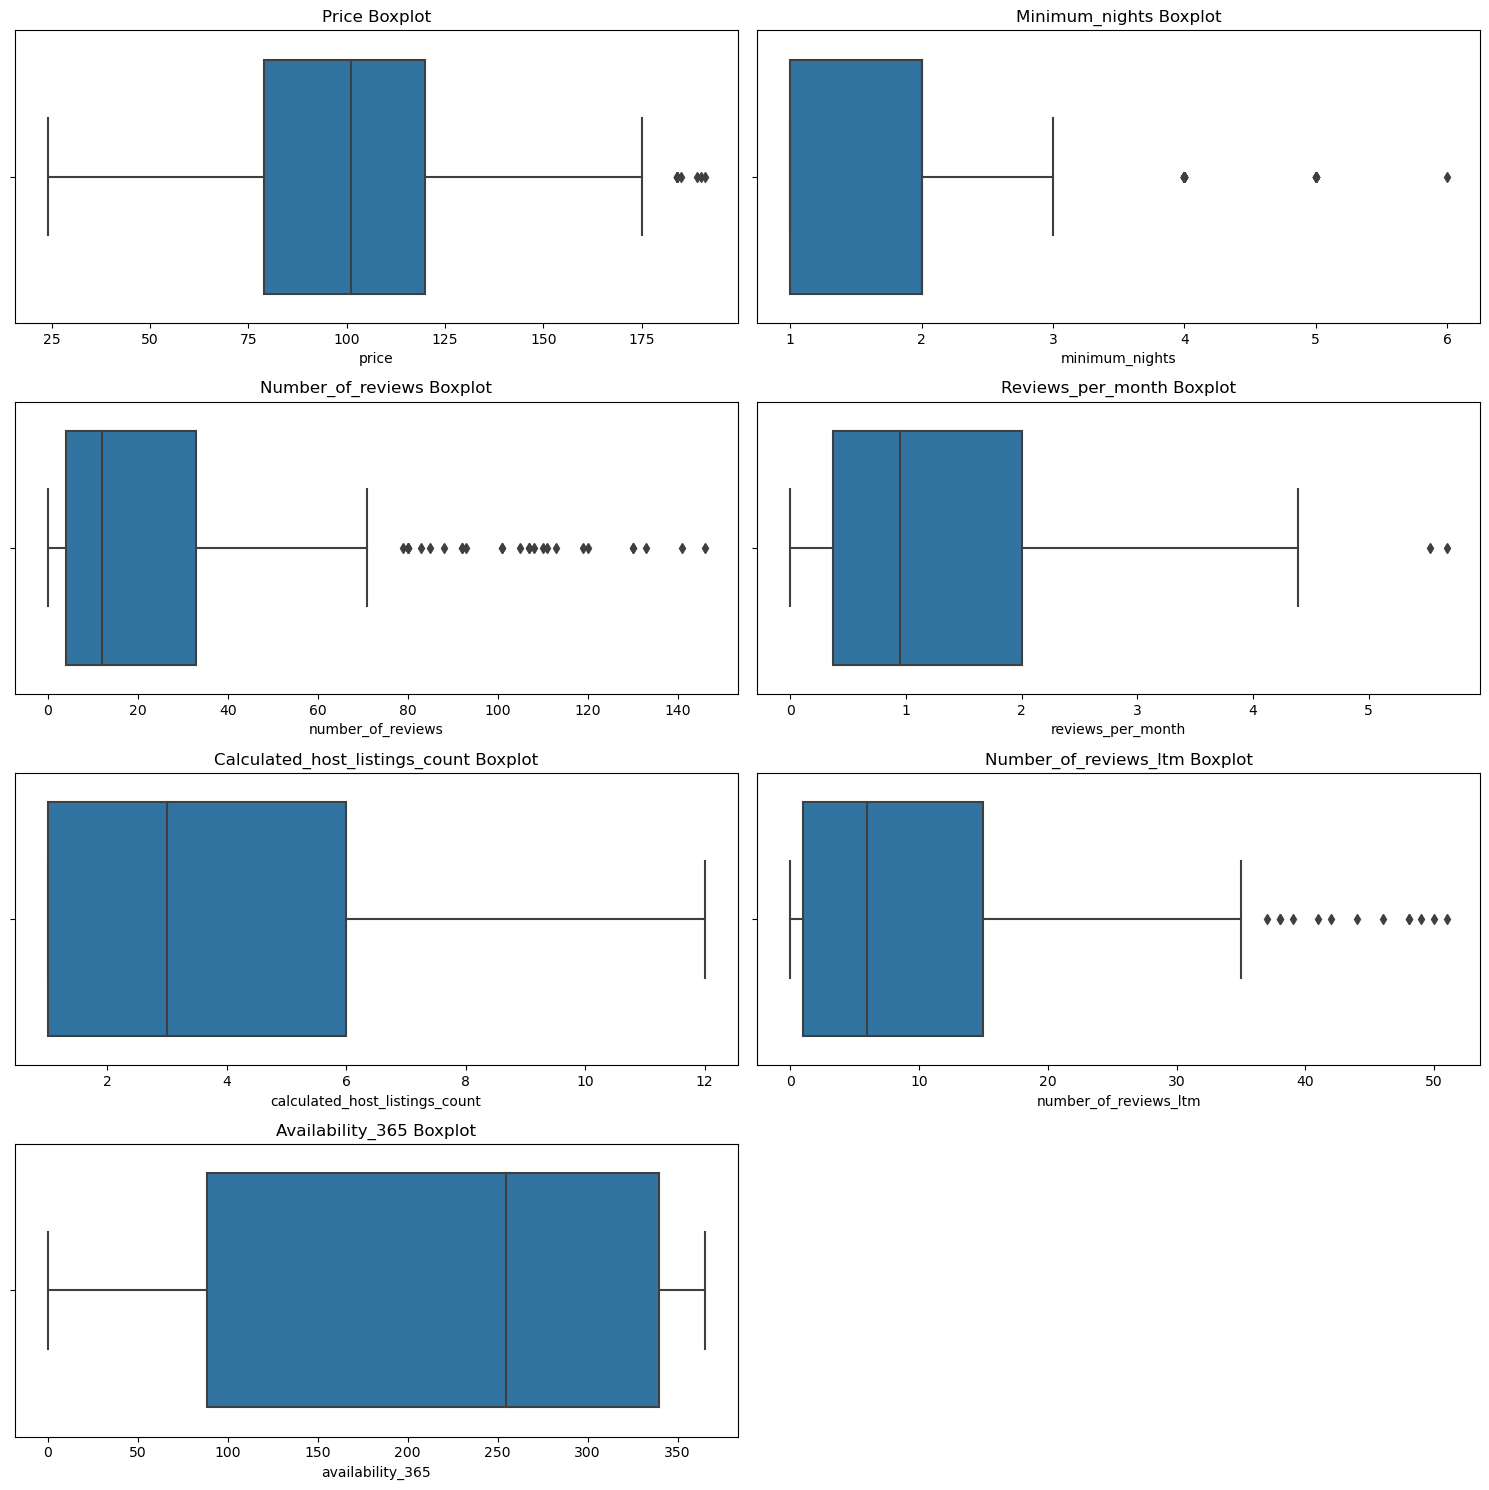

In [65]:
columns_of_interest = ['price', 'minimum_nights', 'number_of_reviews', 
                       'reviews_per_month', 'calculated_host_listings_count', 
                       'number_of_reviews_ltm', 'availability_365']

plt.figure(figsize=(15, 15))

for i, column in enumerate(columns_of_interest, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column.capitalize()} Boxplot')

plt.tight_layout()
plt.show()

### there are outlayers in [price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
### so we will remove it

In [66]:
for column in columns_of_interest:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6,8035768,Entire Beautiful French Victorian 1884,42430824,John M,TENTH WARD,42.660880,-73.781470,Entire home/apt,120.65625,2,56,2024-01-28,0.54,2,365,4
19,15580397,Albany Med/Dwtn Albany/Colleges/BLUE RM/ Share,89705052,Share,NINTH WARD,42.656510,-73.778870,Private room,56.00000,2,40,2024-03-08,0.48,4,112,8
23,17552120,Comfy space in lovely home (Master/Lilac Bedroom),20738797,Aaron,FOURTEENTH WARD,42.657290,-73.803210,Private room,62.00000,1,33,2024-03-01,0.40,1,26,2
25,19527043,Charming 1 Bedroom in a Historic Residential Home,15223767,Ed,NINTH WARD,42.653120,-73.781610,Private room,70.00000,1,71,2023-10-22,1.08,3,242,19
27,19663012,Garden Facing Room | Wifi | Shared Kitchen,39656001,Urbangem,SECOND WARD,42.643600,-73.758870,Private room,169.00000,1,17,2021-08-28,0.21,6,179,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1056469473906808728,"Bonjour, Bienvenue A Chez Pierre",553112010,Linda,TWELFTH WARD,42.714896,-73.876489,Private room,103.00000,2,0,0,0.00,1,268,0
393,1057932481605319073,Apt,217818949,Nickolas,FOURTH WARD,42.663116,-73.738103,Shared room,105.00000,1,1,2024-02-05,0.83,1,269,1
397,1075444056381274297,The Tangerine Door,542733174,Rebecca,TWELFTH WARD,42.679082,-73.795049,Entire home/apt,125.00000,2,3,2024-03-10,2.43,1,238,3
402,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.00000,3,0,0,0.00,9,155,0


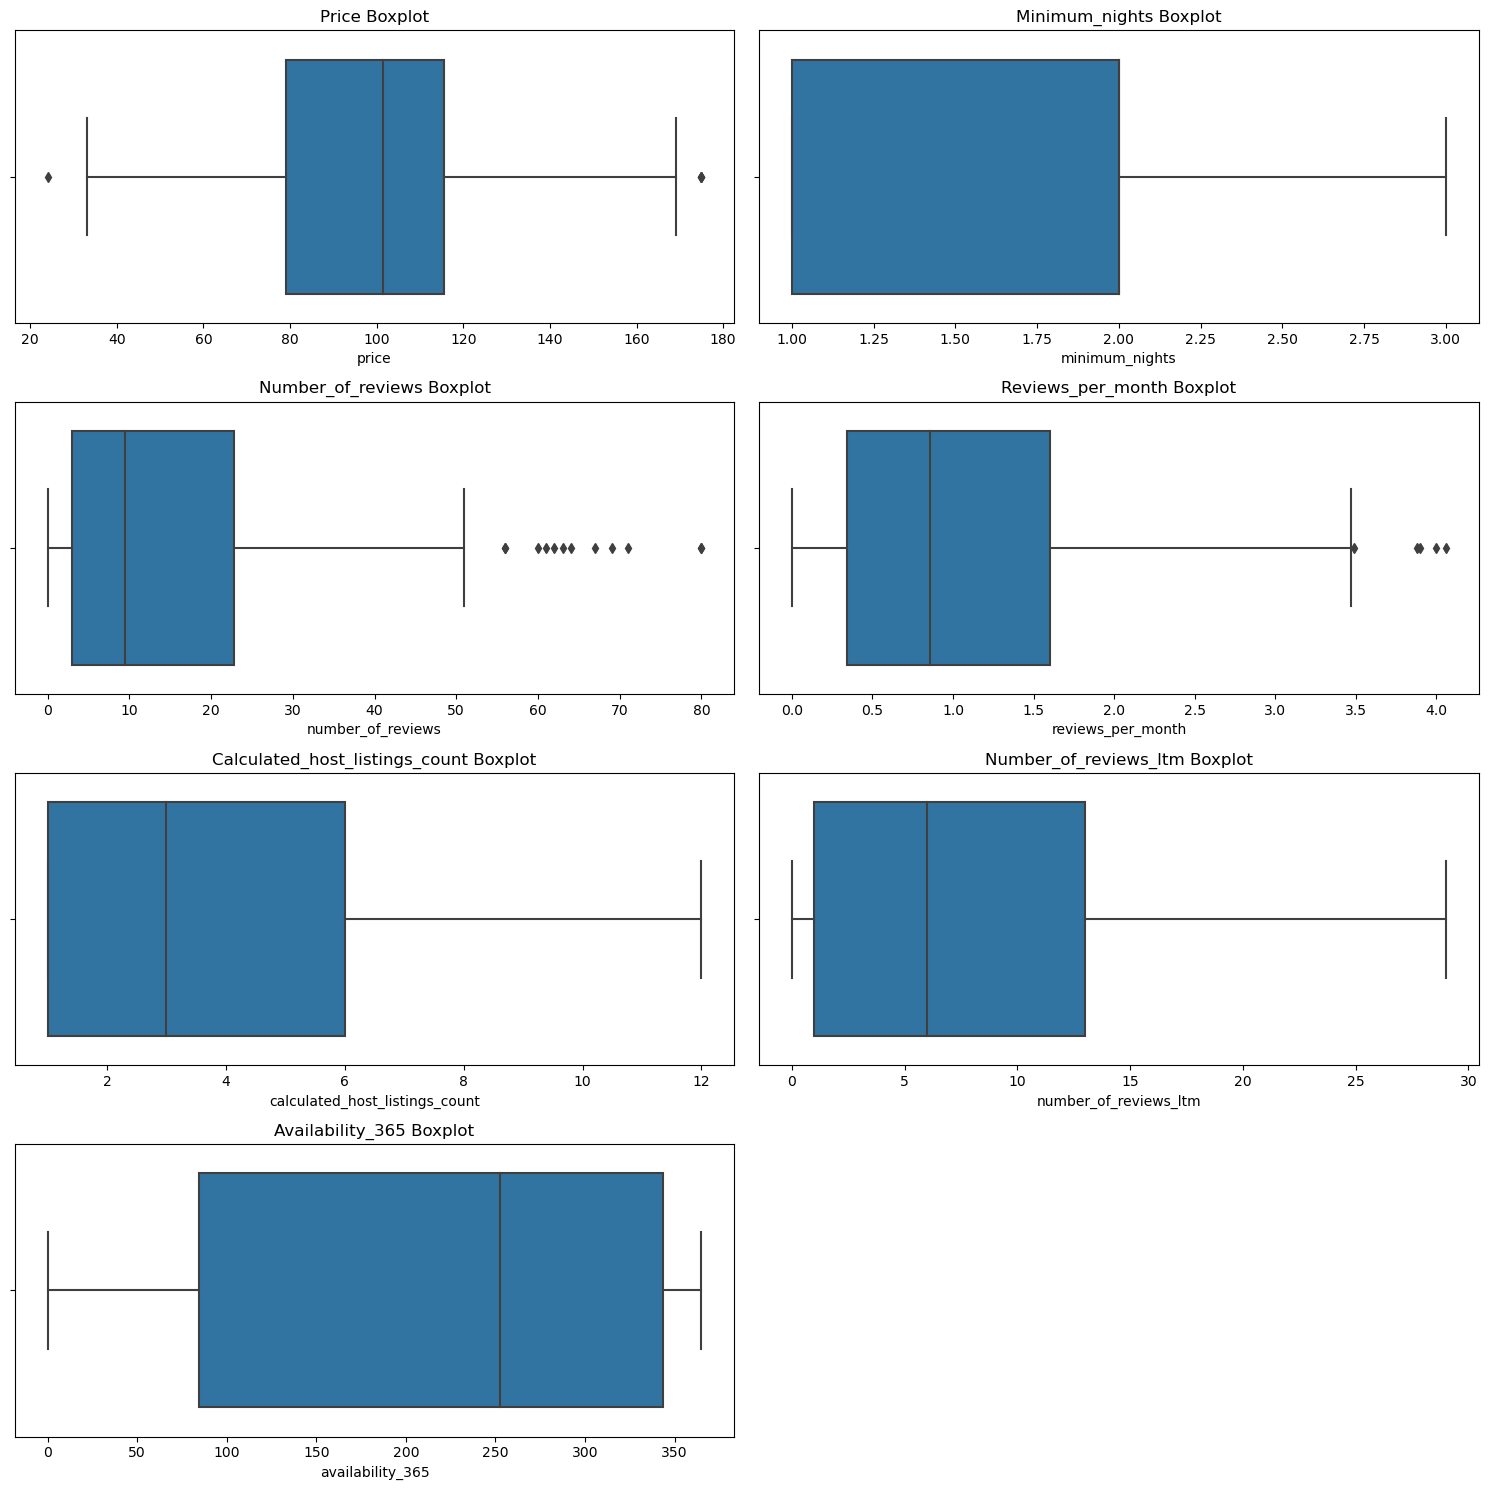

In [67]:
columns_of_interest = ['price', 'minimum_nights', 'number_of_reviews', 
                       'reviews_per_month', 'calculated_host_listings_count', 
                       'number_of_reviews_ltm', 'availability_365']

plt.figure(figsize=(15, 15))

for i, column in enumerate(columns_of_interest, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column.capitalize()} Boxplot')

plt.tight_layout()
plt.show()

### Since Data is cleaned and there is no duplication , we will analyse the data with visualization tools:

### Stakeholders can learn which hosts are well-established in the market and possibly look into joint ventures by determining which hosts have the most properties.

In [86]:
top_10_hosts=df['host_name'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_hosts

Erion        7
Elizabeth    7
Allen        7
Thomas       6
Abba         6
Bela         6
Terra        6
Evolve       6
Joshua       4
Fs           4
Name: host_name, dtype: int64

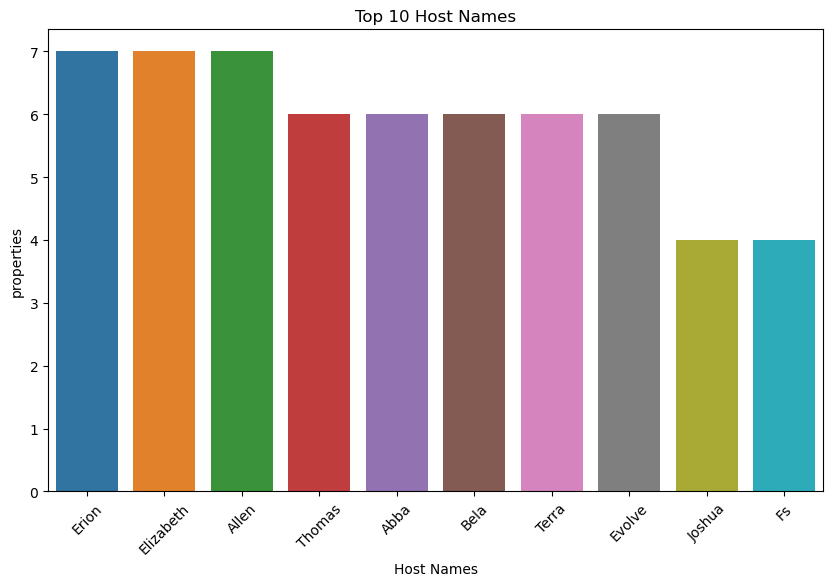

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_hosts.index, y=top_10_hosts.values)
plt.title('Top 10 Host Names')
plt.xlabel('Host Names')
plt.ylabel('properties')
plt.xticks(rotation=45)
plt.show()

# Room types

In [90]:
df['room_type'].value_counts()

Entire home/apt    117
Private room        59
Shared room          2
Name: room_type, dtype: int64

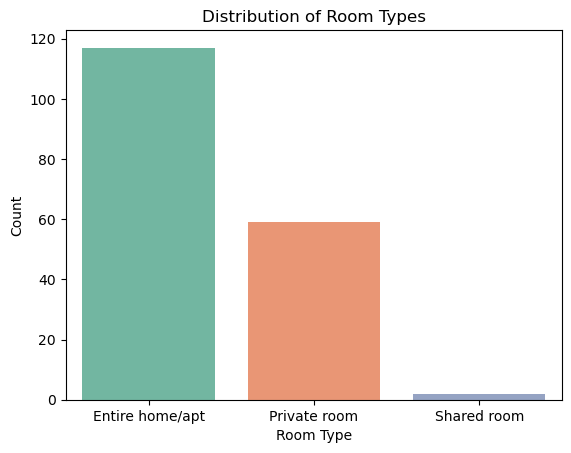

In [95]:
sns.countplot(x='room_type', data=df, palette='Set2')  # Adjust palette as needed
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

#### Understanding room types in Airbnb analysis is crucial for targeting specific audiences, pricing strategies, inventory management, competitive analysis, guest experience enhancement, and regulatory compliance. It helps hosts tailor marketing strategies, allocate resources effectively, identify market trends, and focus on improving amenities, decor, and services. It also ensures compliance with local laws and regulations. Overall, understanding room types in Airbnb analysis helps hosts make informed decisions, optimize performance, and enhance the guest experience.




# Room Type and Availability:

### The relationship between room type and availability in Airbnb listings offers valuable insights into market demand, pricing strategies, and inventory management. It helps hosts understand seasonal demand patterns, adjust pricing and marketing strategies, and optimize inventory management. Understanding the availability of different room types can help assess market saturation, identify opportunities for differentiation, and adapt offerings to guest preferences. By analyzing availability data, hosts can optimize their booking calendars, minimize vacancies, and make informed decisions about pricing, inventory management, and marketing strategies, ultimately improving their competitiveness and revenue potential in the Airbnb market.

In [97]:
df['room_type'].value_counts()

Entire home/apt    117
Private room        59
Shared room          2
Name: room_type, dtype: int64

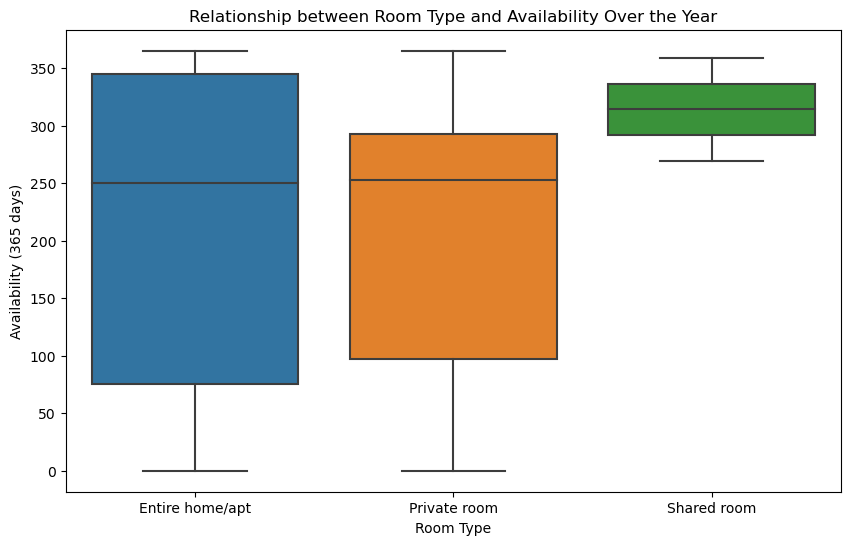

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.title('Relationship between Room Type and Availability in the Year')
plt.xlabel('Room Type')
plt.ylabel('Availability (365 days)')
plt.show()

# Room type and Price

### Understanding the relationship between room type and price in Airbnb listings is crucial for price differentiation, market positioning, revenue optimization, guest expectations, competitive analysis, and market trends. Different room types command different prices based on size, amenities, and privacy. Understanding this helps hosts set competitive pricing, position their listings effectively, and adjust pricing strategies based on demand, seasonality, and competitor pricing. It also helps hosts align their offerings with guest expectations, assess their competitiveness, and adapt their pricing strategies in response to market trends. Overall, this analysis contributes to the success of Airbnb listings.

In [105]:
average_price = df['price'].mean()
average_price

97.31919726093564

In [109]:
room_type_stats = pd.DataFrame({
    'room_type': df['room_type'].unique(),
    'mean_price': df.groupby('room_type')['price'].mean().values,
    'total_reviews': df.groupby('room_type')['number_of_reviews'].sum().values
})

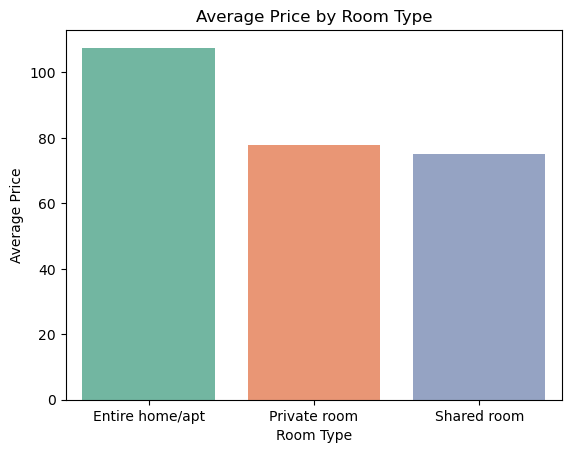

In [114]:
room_type_price = df.groupby('room_type')['price'].mean().reset_index()

sns.barplot( y='price', x='room_type', palette='Set2',data=room_type_price,)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Neighbourhood and Room Type

### Understanding the neighborhood and room type in Airbnb analysis is crucial for targeted marketing, pricing strategy, inventory management, guest experience, competitive analysis, regulatory compliance, and performance evaluation. By analyzing data on popular room types and preferred neighborhoods, hosts can tailor their marketing efforts to attract specific demographics, set competitive prices, allocate resources effectively, and enhance guest experience. By comparing listings with competitors and offering unique room types, hosts can stand out and attract more bookings. Understanding neighborhood dynamics also helps ensure compliance with local laws and regulations. Performance evaluation allows hosts to focus on areas with high demand and adjust offerings based on guest feedback.

In [115]:

df.groupby(['neighbourhood'])['price'].describe().T

neighbourhood,EIGHTH WARD,ELEVENTH WARD,FIFTEENTH WARD,FIFTH WARD,FIRST WARD,FOURTEENTH WARD,FOURTH WARD,NINTH WARD,SECOND WARD,SEVENTH WARD,SIXTH WARD,TENTH WARD,THIRD WARD,THIRTEENTH WARD,TWELFTH WARD
count,1.0,6.000000,8.000000,6.000000,2.000000,12.000000,4.000000,21.000000,21.000000,6.000000,45.000000,17.000000,11.000000,13.000000,5.000000
mean,143.0,91.000000,84.875000,104.333333,120.100000,78.728495,91.750000,84.571429,110.863946,111.562500,102.666366,102.408088,88.318182,77.148718,133.600000
std,NaN,49.927948,41.003266,8.801515,29.839906,26.097137,33.099597,40.205188,22.458509,18.990376,15.485748,30.561928,30.626804,30.708645,30.574499
min,143.0,45.000000,39.000000,93.000000,99.000000,50.000000,45.000000,24.000000,65.000000,82.000000,50.000000,55.000000,45.000000,35.000000,103.000000
25%,143.0,52.500000,57.250000,101.500000,109.550000,58.750000,82.500000,55.000000,97.000000,103.187500,95.000000,75.000000,73.000000,50.000000,110.000000
50%,143.0,81.000000,79.500000,103.500000,120.100000,72.000000,100.000000,85.000000,115.571429,111.593750,107.229730,114.000000,91.000000,77.000000,125.000000
75%,143.0,111.000000,104.500000,104.750000,130.650000,99.250000,109.250000,122.000000,115.571429,127.500000,110.000000,120.656250,100.375000,102.933333,155.000000
max,143.0,175.000000,160.000000,120.000000,141.200000,135.000000,122.000000,157.000000,169.000000,131.000000,130.000000,175.000000,154.000000,126.000000,175.000000


In [118]:
room_count_by_neighbourhood_and_room_type = df.pivot_table(index='neighbourhood', columns='room_type', aggfunc='size', fill_value=0).reset_index()
room_count_by_neighbourhood_and_room_type

room_type,neighbourhood,Entire home/apt,Private room,Shared room
0,EIGHTH WARD,1,0,0
1,ELEVENTH WARD,4,2,0
2,FIFTEENTH WARD,4,4,0
3,FIFTH WARD,5,1,0
4,FIRST WARD,2,0,0
5,FOURTEENTH WARD,6,6,0
6,FOURTH WARD,0,2,2
7,NINTH WARD,8,13,0
8,SECOND WARD,20,1,0
9,SEVENTH WARD,6,0,0


# Average Minimum Nights:

In [123]:
average_minimum_nights = df['minimum_nights'].mean()
print("Average Minimum Nights:", average_minimum_nights)

Average Minimum Nights: 1.7134831460674158


In [124]:
night_count = df.groupby('minimum_nights').size().reset_index(name='Number of nights')
night_count

,minimum_nights,Number of nights
0,1,80
1,2,69
2,3,29


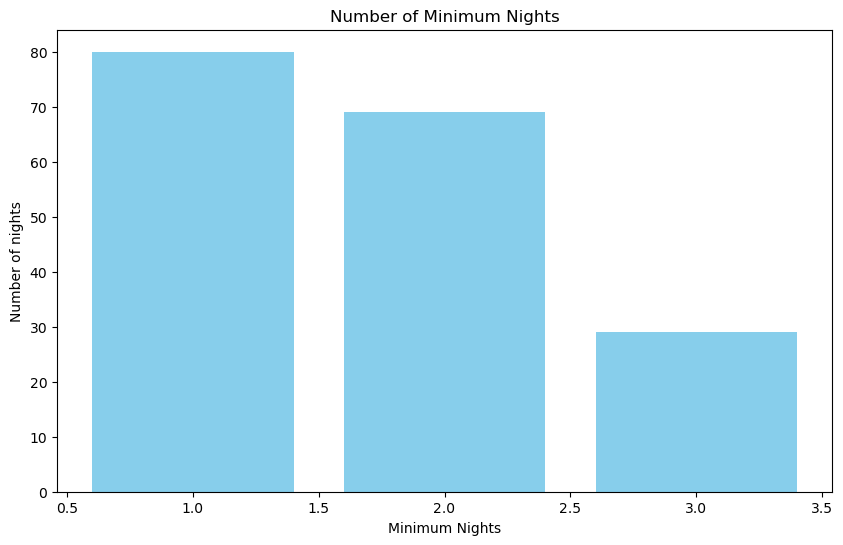

In [126]:
plt.figure(figsize=(10, 6))
plt.bar(night_count['minimum_nights'], night_count['Number of nights'], color='skyblue')
plt.title('Number of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of nights')
plt.show()

### Airbnb's minimum night requirements may encourage longer stays, promoting extended bookings and reducing turnover. These requirements may also increase stability by reducing administrative burdens. Customized pricing may be offered to attract guests seeking extended accommodations. Longer stays may attract quality guests who respect the property and contribute positively to the hosting experience. Market demand considerations may influence these requirements. Clear communication with guests is crucial to avoid misunderstandings and ensure alignment with expectations. Overall, Airbnb's minimum night requirements contribute to the success and sustainability of hosting endeavors.

# Room type,neighbourhood and price

In [136]:
# Grouping the data by neighbourhood and room type and calculating the maximum price in each group
max_price_by_neighbourhood_and_room_type = df.groupby(['neighbourhood', 'room_type'])['price'].max().reset_index()


max_price_by_neighbourhood_and_room_type

,neighbourhood,room_type,price
0,EIGHTH WARD,Entire home/apt,143.00000
1,ELEVENTH WARD,Entire home/apt,175.00000
2,ELEVENTH WARD,Private room,50.00000
3,FIFTEENTH WARD,Entire home/apt,160.00000
4,FIFTEENTH WARD,Private room,71.00000
5,FIFTH WARD,Entire home/apt,120.00000
6,FIFTH WARD,Private room,93.00000
7,FIRST WARD,Entire home/apt,141.20000
8,FOURTEENTH WARD,Entire home/apt,135.00000
9,FOURTEENTH WARD,Private room,105.00000


In [140]:
max_price_by_neighbourhood_and_room_type = df.groupby(['neighbourhood', 'room_type'])['price'].max().reset_index()
sorted_max_price_by_neighbourhood_and_room_type = max_price_by_neighbourhood_and_room_type.sort_values(by='price', ascending=False)
sorted_max_price_by_neighbourhood_and_room_type.head(10)

,neighbourhood,room_type,price
25,TWELFTH WARD,Entire home/apt,175.0
20,TENTH WARD,Private room,175.0
1,ELEVENTH WARD,Entire home/apt,175.0
15,SECOND WARD,Private room,169.0
3,FIFTEENTH WARD,Entire home/apt,160.0
12,NINTH WARD,Entire home/apt,157.0
21,THIRD WARD,Entire home/apt,154.0
14,SECOND WARD,Entire home/apt,145.0
0,EIGHTH WARD,Entire home/apt,143.0
7,FIRST WARD,Entire home/apt,141.2


### we note that prices in this region is high

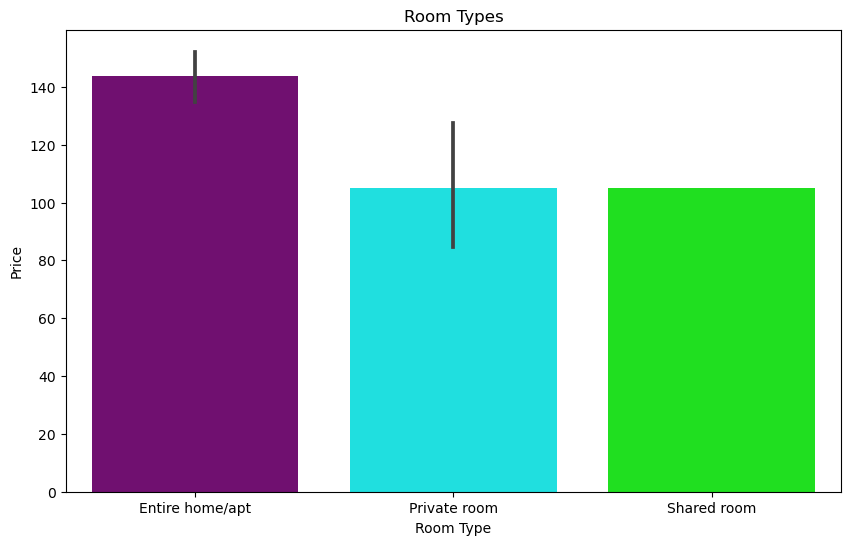

In [158]:
custom_room_type_colors = {
    'Entire home/apt': 'purple',
    'Private room': 'cyan',
    'Shared room': 'lime',
    'Hotel room': 'magenta'
}

plt.figure(figsize=(10, 6))
sns.barplot(data=max_price_by_neighbourhood_and_room_type, x='room_type', y='price', palette=custom_room_type_colors)
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Recommendation :

## 1-Learn from Successful Hosts:

#### Stakeholders should study the top 10 hosts to understand successful operational patterns and improve their own offerings and pricing strategies.

## 2-Diversify Accommodation Options: 

#### Maintain a diverse range of accommodation options to attract a wider audience, considering the popularity of "Entire home/apt" and "Private room" types.

## 3-Enhance Hotel Room Offerings:

#### Focus on enhancing the appeal of "Hotel room" listings by offering unique amenities or experiences to attract guests seeking a hotel-like experience.

## 4-Promote Shared Rooms:

#### Increase visibility and bookings for "Shared room" listings by targeting budget-conscious travelers or those seeking communal living experiences.

## 5-Diversify Room Offerings:

#### Offer a mix of room types to accommodate varying levels of availability throughout the year and optimize occupancy rates.

## 6-Optimize Pricing Strategies: 

#### Implement dynamic pricing models for high availability room types and offer promotional discounts for low availability room types during off-peak periods.

## 7-Customize Pricing by Room Type:

####  Implement pricing strategies tailored to each room type to maximize revenue potential and stay competitive.


## 8-Tailor Marketing Strategies:

#### Use data on room availability to tailor marketing strategies and promotions effectively to attract guests with preferences aligned with the available room types.

## 9-Adjust Minimum Night Requirements: 

#### Set appropriate minimum night requirements based on guest preferences and market demand to optimize occupancy rates and guest satisfaction.

## 10-Offer Flexible Booking Options:

#### Consider offering flexible booking options to attract short-term guests while meeting the needs of guests seeking extended stays.

## 11-Prioritize Investments: 

#### Prioritize investments in neighborhoods with high average reviews per month to capitalize on positive reputation and guest satisfaction.


## 12-Tailor Pricing Strategies by Neighborhood: 

####  Adopt tailored pricing strategies based on the distinct pricing dynamics observed across different neighborhood groups to optimize market competitiveness and revenue potential.

# By implementing these recommendations and insights, stakeholders can enhance their competitiveness, attract more guests, and optimize revenue generation in the Airbnb market.